In [33]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
df = pd.read_csv('loan_approval_dataset.csv')
df.drop('loan_id', axis=1, inplace=True)
df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
le = LabelEncoder()

df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])

df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


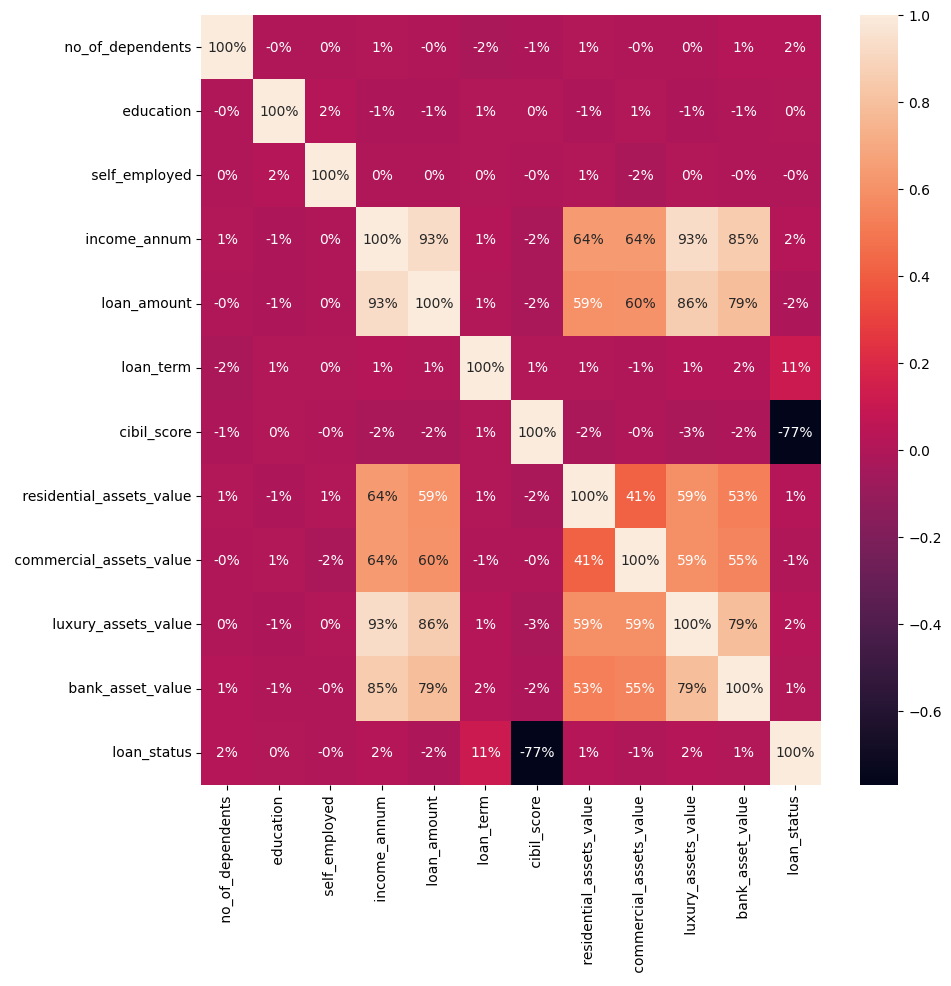

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")
plt.show()


In [19]:

df['Total assets'] = df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value'] + df[' bank_asset_value']


In [20]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
 12  Total assets               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [21]:

df.rename(columns={'Total assets': 'Total Assets Value'}, inplace=True)
df


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total Assets Value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1,7400000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,20000000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,39000000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,28800000


In [22]:
df['Income x Loan Term'] = df[' income_annum'] * df[' loan_term']
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total Assets Value,Income x Loan Term
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000,115200000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000,32800000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000,182000000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000,65600000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000,196000000


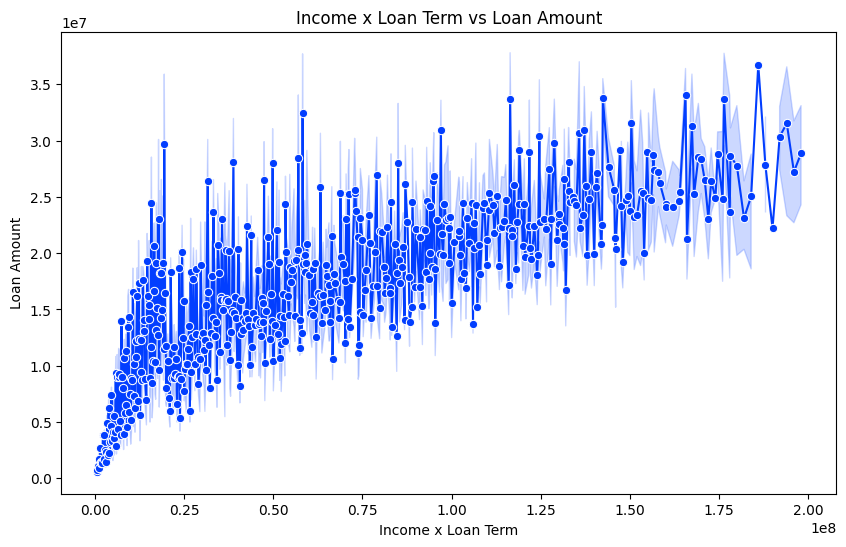

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.lineplot(data=df, x='Income x Loan Term', y=' loan_amount', marker='o')
plt.xlabel("Income x Loan Term")
plt.ylabel("Loan Amount")
plt.title("Income x Loan Term vs Loan Amount")
plt.show()
